## WeGo Data Introduction

In [1]:
import pandas as pd

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [4]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [5]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [6]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [7]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [10]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [11]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


1. What is the overall on-time performance, and what do the overall distribution of adherence look like? 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
wego['on-time performance'] = (wego['ADJUSTED_ONTIME_COUNT'] * 100) / (wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT'])

In [14]:
percentage_ones = (wego['ADJUSTED_ONTIME_COUNT'] == 1).mean() * 100

print(percentage_ones)

77.08411236295025


About 77.08% of the trips are on-time.

In [15]:
(wego['ADJUSTED_ONTIME_COUNT'] *100)/ (
    wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT']
)

0         100.0
1         100.0
2         100.0
3         100.0
4         100.0
          ...  
350324      0.0
350325      0.0
350326    100.0
350327      0.0
350328      0.0
Length: 350329, dtype: float64

In [16]:
wego['On-time Status'] = wego['ADJUSTED_ONTIME_COUNT'].map({1: 'On-time', 0: 'Late or Early'})

C:\Users\kite7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


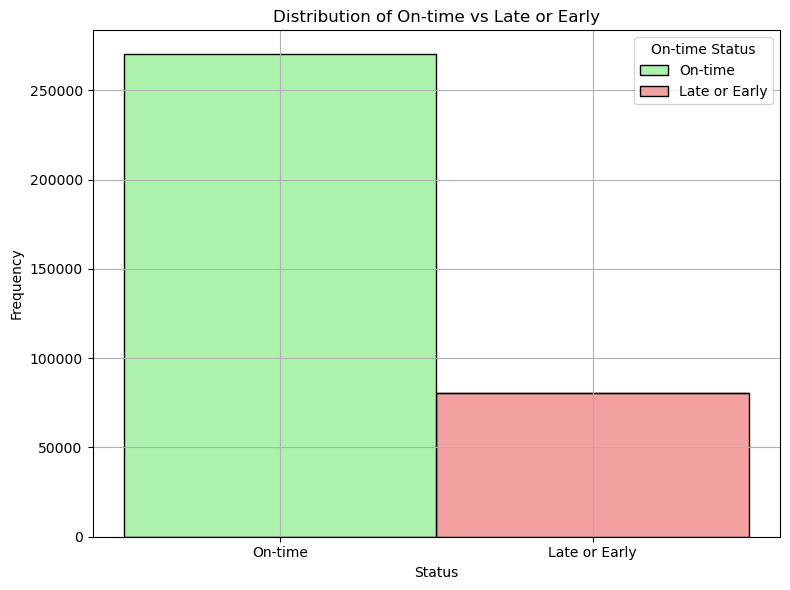

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(wego, x='On-time Status', hue='On-time Status', multiple='stack', palette=['lightgreen', 'lightcoral'])
plt.title('Distribution of On-time vs Late or Early')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

About 77.08% of the trips are on-time, and 22.92% late or early.

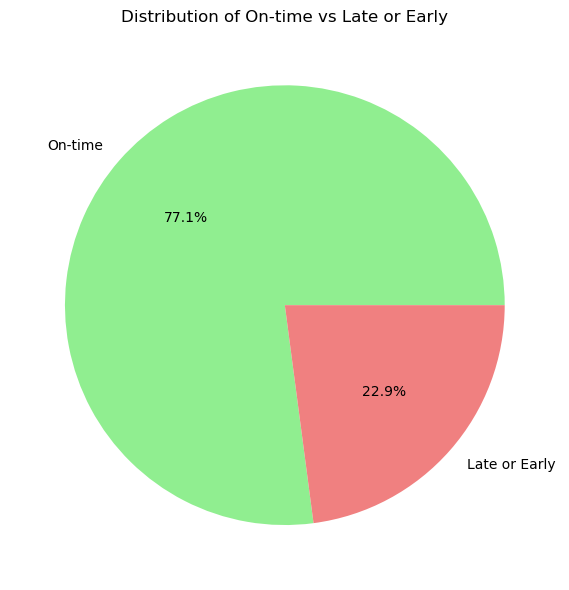

In [18]:

status_counts = wego['On-time Status'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Distribution of On-time vs Late or Early')
plt.tight_layout()
plt.show()

In [19]:
wego.shape

(350329, 32)

In [20]:
trip_adherence = wego.groupby('TRIP_ID')['ADHERENCE'].mean().reset_index()

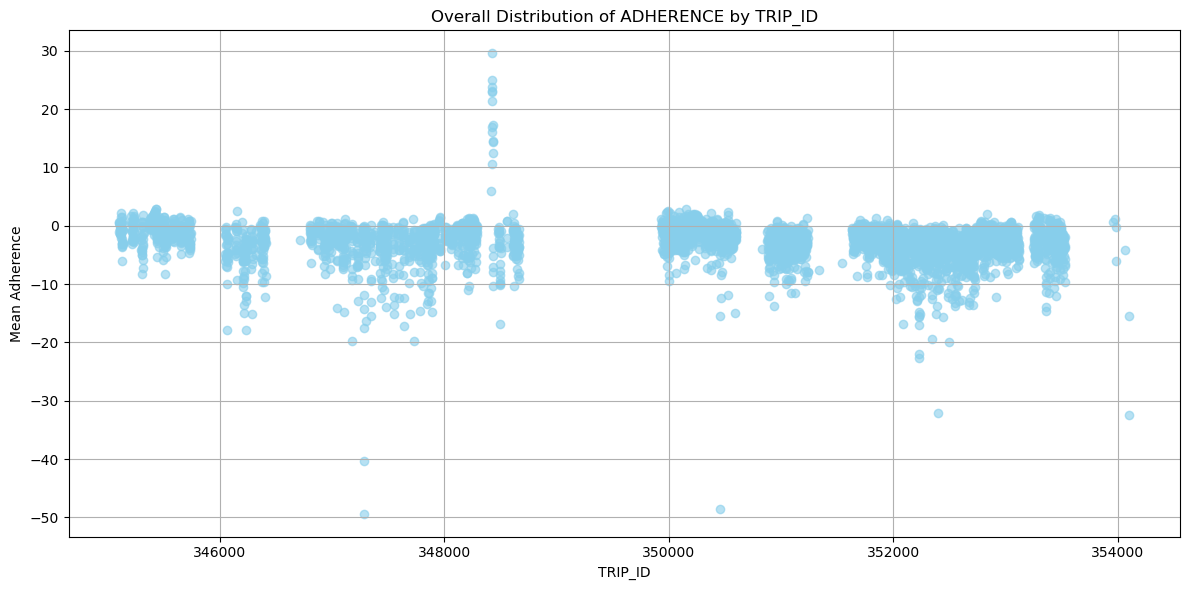

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(trip_adherence['TRIP_ID'], trip_adherence['ADHERENCE'], color='skyblue', alpha=0.6)
plt.title('Overall Distribution of ADHERENCE by TRIP_ID')
plt.xlabel('TRIP_ID')
plt.ylabel('Mean Adherence')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
unique_trip_ids = wego['TRIP_ID'].nunique()

print(f"Number of unique TRIP_IDs: {unique_trip_ids}")

Number of unique TRIP_IDs: 3987


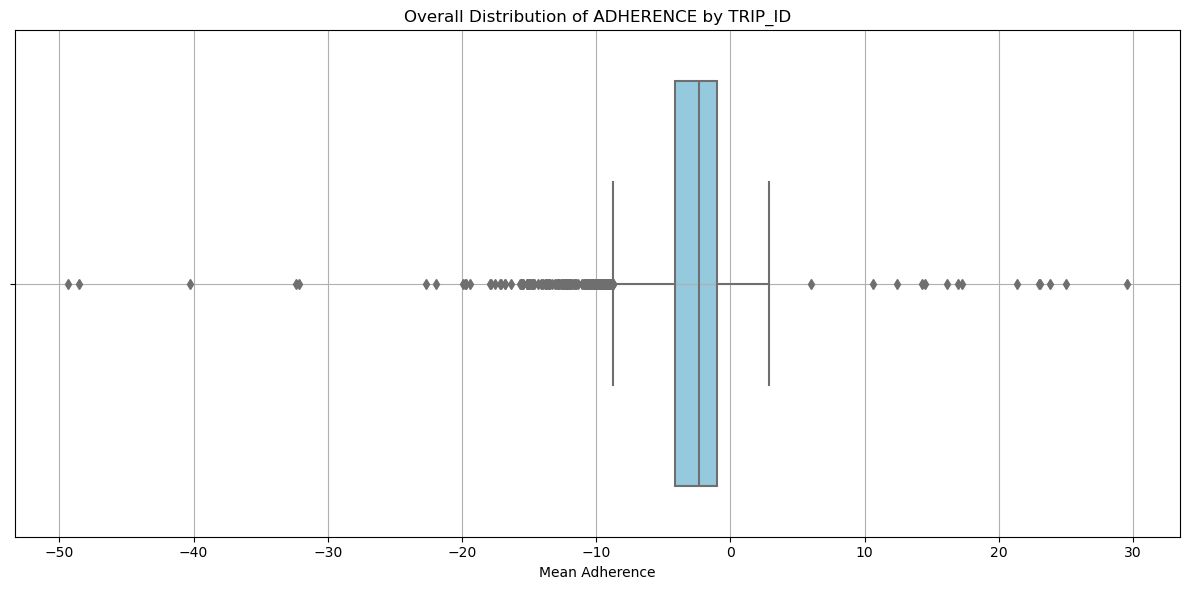

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=trip_adherence['ADHERENCE'], color='skyblue')
plt.title('Overall Distribution of ADHERENCE by TRIP_ID')
plt.xlabel('Mean Adherence')
plt.grid(True)
plt.tight_layout()
plt.show()

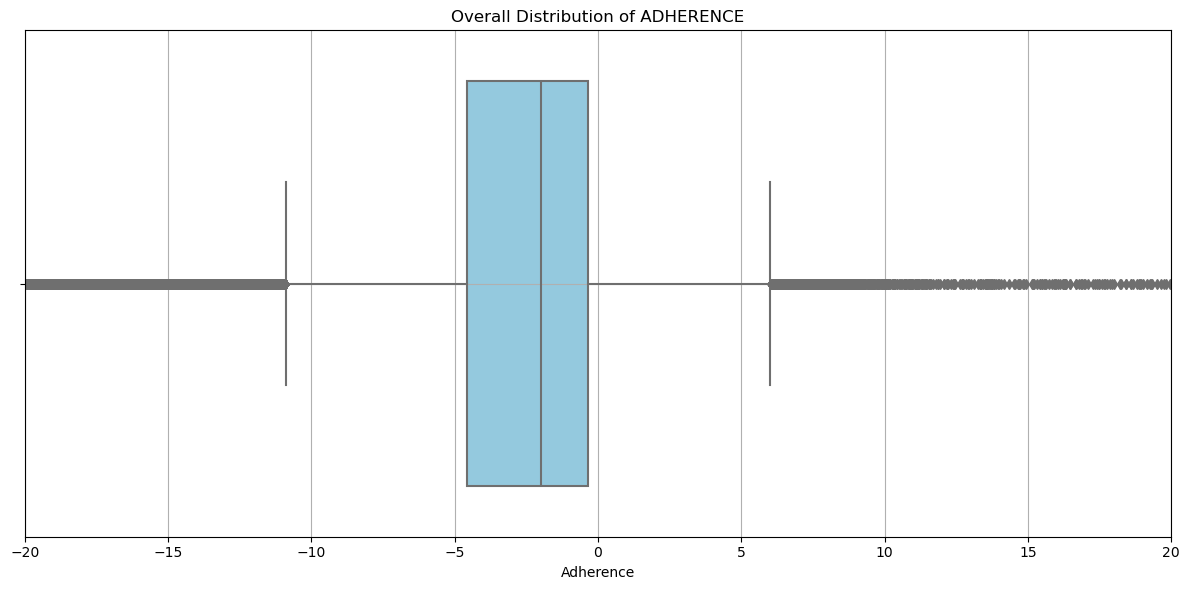

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=wego['ADHERENCE'], color='skyblue')
plt.title('Overall Distribution of ADHERENCE')
plt.xlabel('Adherence')

# Set x-axis limits from -20 to +20
plt.xlim(-20, 20)

plt.xticks(ticks=range(-20, 21, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

#Alekya code
wego['on-time performance']=(wego['ADJUSTED_ONTIME_COUNT'] *100)/ (
    wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT']
)

In [25]:
wego['on-time performance']=(wego['ADJUSTED_ONTIME_COUNT'] *100)/ ( wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT'] )

In [26]:
route_adherence_info = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean().reset_index()

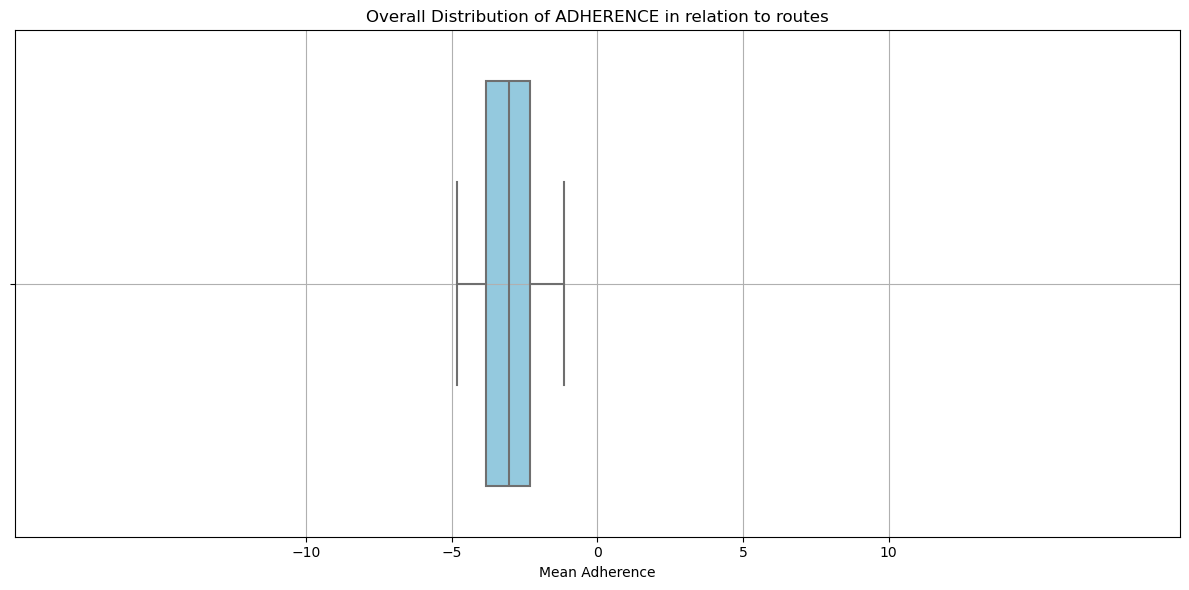

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=route_adherence_info['ADHERENCE'], color='skyblue')
plt.title('Overall Distribution of ADHERENCE in relation to routes')
plt.xlabel('Mean Adherence')


plt.xlim(-20, 20)

plt.xticks(ticks=range(-10, 11, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

4. How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

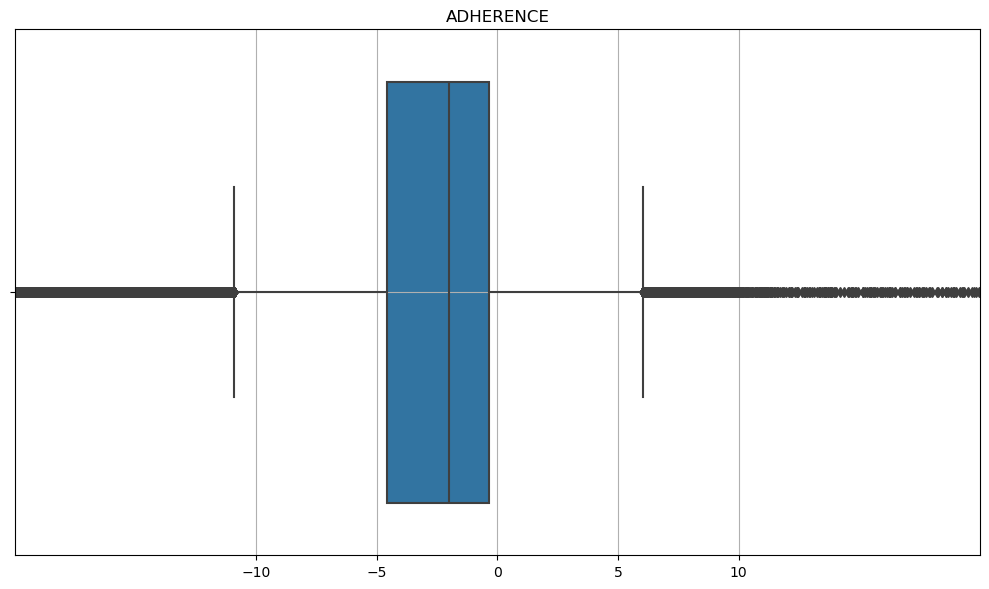

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=wego['ADHERENCE'])
plt.title('ADHERENCE')
plt.xlabel('')
plt.grid(True)

plt.xlim(-20, 20)

plt.xticks(ticks=range(-10, 11, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES', 'on-time performance', 'On-time Status'],
      dtype='object')

In [29]:
unique_operators = wego['OPERATOR'].unique()

In [30]:
print(unique_operators)

[1040 2374 2689 1617 2427 1892 1190 1222 2355 2125 2649 1761 1893 2041
 1170 1823 1198 1147  522 2603  409 2958 2088 2348 2706 1368 3100 2529
 1237 1992 2059 2441 1204  326 2306 2177  559 2963 1948 2230 1703 2569
 2055 2675 2752  517 2586 2623  907 1682 1619 1133  659 1266 1623 1938
 1410 1705 1927 1391 2629  304  357 2500 2112 1505 1904 2577 1052 1800
 2253 1489 1542 2624 2062  359 1582 2428  332 2967 3016 2760 2584 1206
 2399 3124 2109 1208 3012 1361 2990 1650 1359  611 1590 2832 2560  520
 2371 1175 2200 1352 2714 1500 2817 3096 1958 2458 1601 1343 1016 2217
 1866 2987 1372 2792 1330 2733 1713 1406 2780  471 2638 1780 1177 2221
 1743 3144  572 2400  341 2312  778 2697  723 2324 2164 2618 2563 2809
 2448 1762 1401 2352  414 2497 2357 2545 3088 3015 2703  624 1566 2040
 3103 1736 2765 2610 3013 1379 3127 2549 3090 1730 3087 3035 2479 3128
 2954 1865 1914 2793 2207 1277 2505 1717 2783 1598 2161 2001 2630 1997
 2585 2335 1922 1716 1842 2246 2594 2512 2600 3093 1788 2972 2254 2969
 3079 

In [31]:
# Alks code
wego['on-time performance'] = (wego['ADJUSTED_ONTIME_COUNT'] * 100) / (wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT'])

operator_performance = wego.groupby('OPERATOR')['on-time performance'].mean().reset_index()

print("On-time performance by Operator:")
print(operator_performance)

On-time performance by Operator:
     OPERATOR  on-time performance
0           0           100.000000
1          56           100.000000
2         235            50.000000
3         244            80.000000
4         301            51.351351
..        ...                  ...
336      3149            86.363636
337      3156            75.517241
338      3165            37.500000
339      3166            91.428571
340      3173            90.909091

[341 rows x 2 columns]


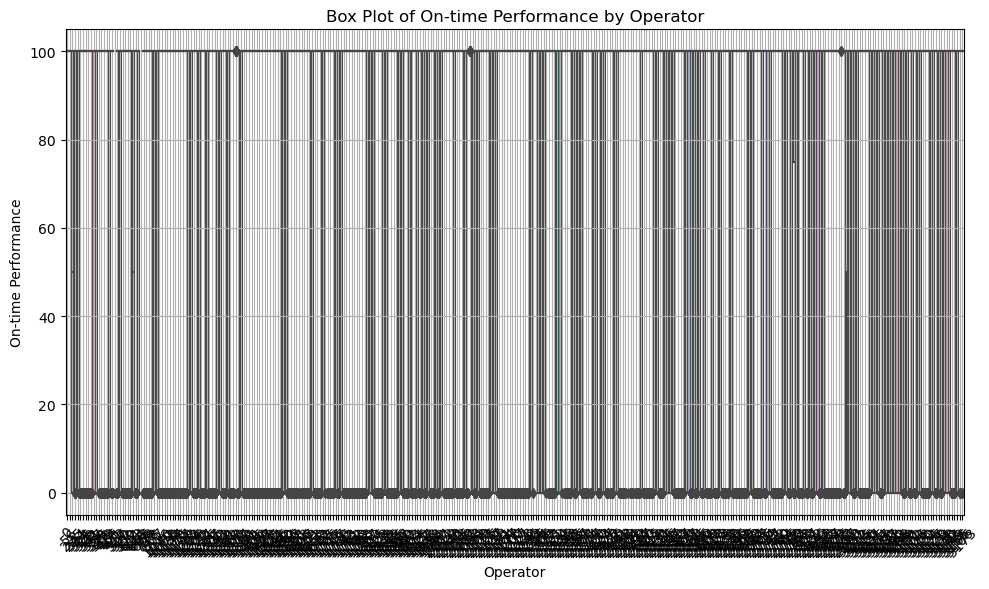

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OPERATOR', y='on-time performance', data=wego)
plt.title('Box Plot of On-time Performance by Operator')
plt.xlabel('Operator')
plt.ylabel('On-time Performance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
wego['on-time performance'] = (wego['ADJUSTED_ONTIME_COUNT'] * 100) / (wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT'])

operator_trip_performance = wego.groupby(['OPERATOR', 'TRIP_ID'])['on-time performance'].mean().reset_index()

print(operator_trip_performance)

       OPERATOR  TRIP_ID  on-time performance
0             0   350275           100.000000
1            56   353105           100.000000
2            56   353106           100.000000
3           235   350491            42.857143
4           235   350492            75.000000
...         ...      ...                  ...
19986      3173   350133           100.000000
19987      3173   350134           100.000000
19988      3173   350135           100.000000
19989      3173   350136            80.000000
19990      3173   350137           100.000000

[19991 rows x 3 columns]


In [34]:
import numpy as np

# Alks code
wego['on-time performance'] = (wego['ADJUSTED_ONTIME_COUNT'] * 100) / (wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT'])

In [35]:
ave_route_success = wego.groupby('ROUTE_ABBR')['on-time performance'].mean().reset_index()

(ave_route_success)

,ROUTE_ABBR,on-time performance
0,3,75.879353
1,7,77.703133
2,22,89.296490
3,23,88.611202
4,50,85.174412
5,52,76.501713
6,55,69.716198
7,56,82.037320


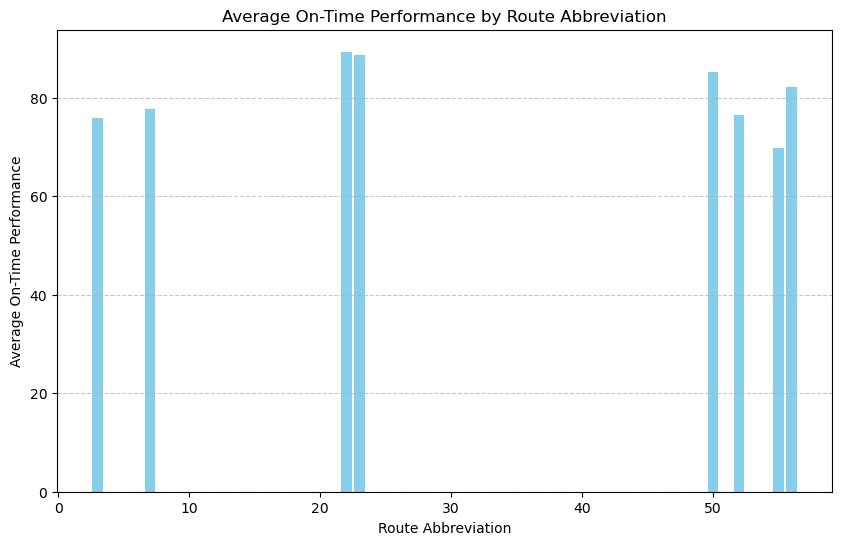

In [36]:
plt.figure(figsize=(10, 6))  
plt.bar(ave_route_success['ROUTE_ABBR'], ave_route_success['on-time performance'], color='skyblue')
plt.xlabel('Route Abbreviation')
plt.ylabel('Average On-Time Performance')
plt.title('Average On-Time Performance by Route Abbreviation')
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()

In [37]:
Route_mapping = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}

ave_route_success['ROUTE_ABBR'] = ave_route_success['ROUTE_ABBR'].astype(str)
ave_route_success['Route'] = ave_route_success['ROUTE_ABBR'].map(Route_mapping)

print(ave_route_success)

  ROUTE_ABBR  on-time performance              Route
0          3            75.879353           West End
1          7            77.703133          Hillsboro
2         22            89.296490           Bordeaux
3         23            88.611202     Dickerson Pike
4         50            85.174412     Charlotte Pike
5         52            76.501713   Nolensville Pike
6         55            69.716198  Murfreesboro Pike
7         56            82.037320      Gallatin Pike


In [38]:
ave_route_success

,ROUTE_ABBR,on-time performance,Route
0,3,75.879353,West End
1,7,77.703133,Hillsboro
2,22,89.296490,Bordeaux
3,23,88.611202,Dickerson Pike
4,50,85.174412,Charlotte Pike
5,52,76.501713,Nolensville Pike
6,55,69.716198,Murfreesboro Pike
7,56,82.037320,Gallatin Pike


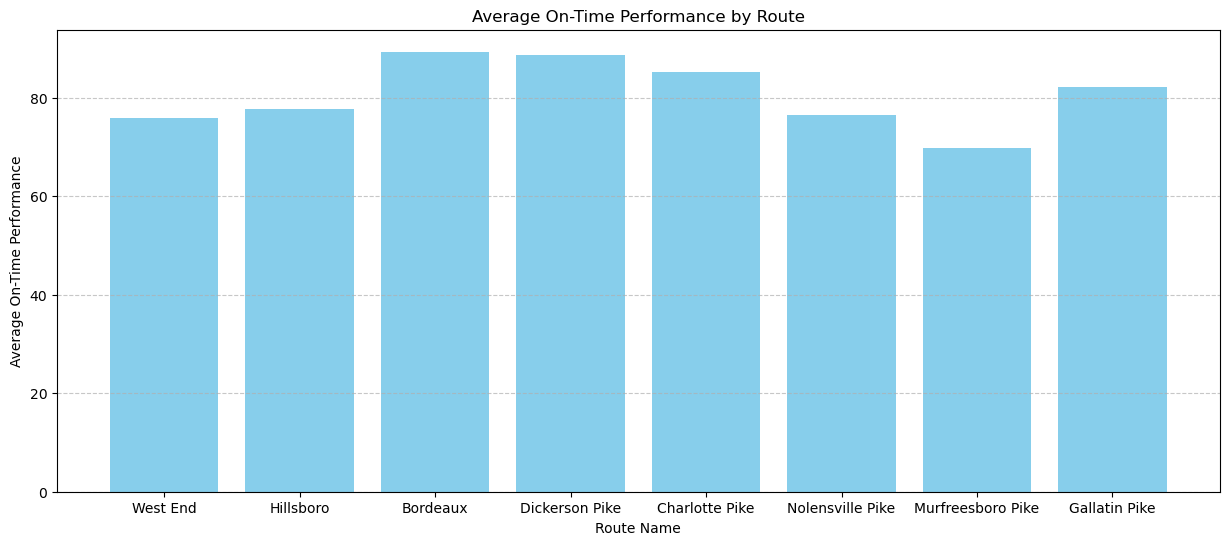

In [39]:
plt.figure(figsize=(15, 6))  
plt.bar(ave_route_success['Route'], ave_route_success['on-time performance'], color='skyblue')
plt.xlabel('Route Name')
plt.ylabel('Average On-Time Performance')
plt.title('Average On-Time Performance by Route')
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()